<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Random Numbers (Need)</span></div>

## 1 Random Numbers

### 1.1 Real and Pseudo Random Numbers

### 1.2 NumPy’s PRNG

In [3]:
np.random.rand()                # np.random.rand() generates an array of numbers w values from 0-1 

NameError: name 'np' is not defined

In [5]:
np.random.rand(3)   # will return an array of 3 random numbers between 0 and 1

array([0.1537883 , 0.25188938, 0.72025919])

In [6]:
np.random.rand(10,3) # will return an array of 10,2

array([[0.16036549, 0.97961661, 0.35277225],
       [0.71943804, 0.41476637, 0.51935379],
       [0.41148404, 0.93694506, 0.9360067 ],
       [0.31585725, 0.20972835, 0.48263234],
       [0.19433475, 0.66611858, 0.83161208],
       [0.27045042, 0.625655  , 0.91275878],
       [0.94181556, 0.40900272, 0.07797649],
       [0.1071196 , 0.30633081, 0.69423224],
       [0.71850909, 0.08418263, 0.23712761],
       [0.79194681, 0.05351966, 0.94309223]])

In [7]:
n = 10000
random_numbers = np.random.rand(n) # numbers are evenly distributed

np.sum(random_numbers < .5) / n * 100 # shld be around 50%

50.239999999999995

In [8]:
np.sum(random_numbers < .25) / n * 100 # shld be around 25%

25.16

In [9]:
np.sum(random_numbers > .75) / n * 100 # shld be around 25%

25.22

### 1.3 A simple graphical test

In [11]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Value of random number')

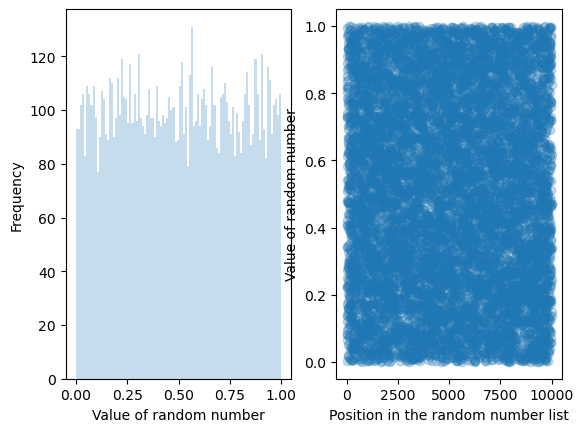

In [10]:
n = 10000
random_numbers = np.random.rand(n)

fig, ax = plt.subplots(nrows=1, ncols=2) # 2 plots in 1 figure

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25) #data divided into intervals called bins. parameter counts the no. of bins 
axis.set_xlabel("Value of random number") # in which the data is divided
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25) # scatter plot
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.4 Uniformly beyond \([0,1)\)

Text(0, 0.5, 'Value of random number')

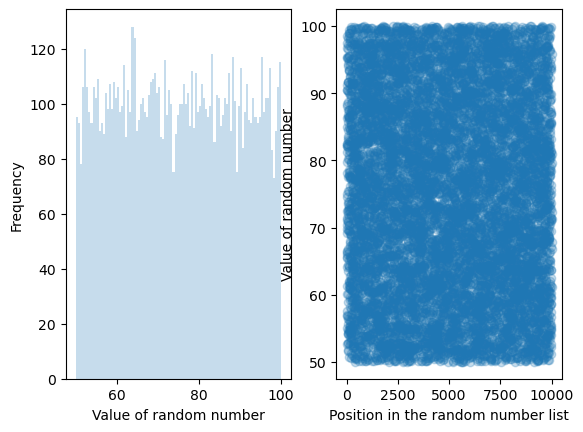

In [12]:
n = 10000
random_numbers = np.random.uniform(low=50, high=100, size=n) #numbers are between 50 and 100 now cus the low and high is set
fig, ax = plt.subplots(nrows=1, ncols=2) # array of n random numbers over the range of 50-100

axis = ax[0]
axis.hist(random_numbers, bins=100, alpha=.25)
axis.set_xlabel("Value of random number")
axis.set_ylabel("Frequency")

axis = ax[1]
axis.scatter(range(n), random_numbers, alpha=.25)
axis.set_xlabel("Position in the random number list")
axis.set_ylabel("Value of random number")

### 1.5 ‘seeding’ a PRNG

In [13]:
np.random.randint(0, 100, 10)     # Ten random integers between 0 and 100. take note that it does not include 100. 

array([46, 70, 81, 69, 94, 80, 45, 18, 78, 13])

In [14]:
np.random.randint(0, 100, 10)     # diff 10 integers compared to the line above 

array([ 0, 98, 74, 92, 66, 44, 71, 81, 21, 50])

In [15]:
np.random.seed(1234)              # Specifying a seed so that the same seq of numbers will be generated
np.random.randint(0, 100, 10)  

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

In [16]:
np.random.seed(1234) # seed is used to see if ur data is reproduceable 
np.random.randint(0, 100, 10)     # Same ten integers between 0 and 100

array([47, 83, 38, 53, 76, 24, 15, 49, 23, 26])

## 2 Simulating a Magic-8 Ball

In [17]:
def shake_magic_8():
    '''
    Function to simulate a Magic-8 ball!
    '''
    options = ['It is certain.', 'It is decidedly so.',
               'Without a doubt.', 'Yes definitely.',
               'You may rely on it.', 'As I see it, yes.',
               'Most likely.', 'Outlook good.',
               'Yes.', 'Signs point to yes.',
               'Reply hazy, try again.', 'Ask again later.',
               'Better not tell you now.', 'Cannot predict now.',
               'Concentrate and ask again.', 'Don\'t count on it.',
               'My reply is no.', 'My sources say no.',
               'Outlook not so good.', 'Very doubtful.']

    return np.random.choice(options) # np.random.choice generates random sample from a given 1D array. can be with or 
                                     # without replacement. syntax : np.random.choice(array,size=,replace=,p=). p is 
                     # probabilities associated w array. that means it will give any of the elements in the list randomly 

In [18]:
questions = ['Will I be pretty?',
             'Will I be rich?',
             'Will I be in trouble?']

for question in questions:
    print(f'Q: {question}')
    print(f'A: {shake_magic_8()}\n') # the \n here is a line break so it adds an empty line after ans is printed. thats 
                                     # why there is a 'gap' btwn the pairs of Q&A

Q: Will I be pretty?
A: Ask again later.

Q: Will I be rich?
A: Better not tell you now.

Q: Will I be in trouble?
A: My reply is no.



## 3 Flipping Coins

### 3.1 A fair coin

In [19]:
np.random.choice(['Head', 'Tails']) # randomly choose btwn the 2 elements 


'Head'

In [20]:
no_of_coins = 10
np.random.choice(['Head', 'Tails'], no_of_coins) # no_of_coins is the size which is the size of sample returned 

array(['Tails', 'Head', 'Tails', 'Tails', 'Head', 'Head', 'Tails', 'Head',
       'Head', 'Tails'], dtype='<U5')

In [21]:
def flip_coins(no_of_coins=1, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins) # generates seq of no_of_coins random no.s btwn 0-1 that rep outcome of each coin flip
    no_of_heads = np.sum(results > probability) # result is an array. result>probability is boolean. np.sum counts no. of true. could also use len
                                            # can also do < probability bcos it is a fair coin so it is equal probability
    return no_of_heads

In [22]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins)
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%') # the 2f is used to show the output as a float with 2 decimal places

Number of heads: 51.60%


### 3.2 A biased coin

In [23]:
no_of_coins = 1_000
no_of_heads = flip_coins(no_of_coins, probability = .3) # here probability is specified so it wont be default .5 
print(f'Number of heads: {no_of_heads/no_of_coins*100:.2f}%')

Number of heads: 66.70%


### 3.3 A flipping experiment

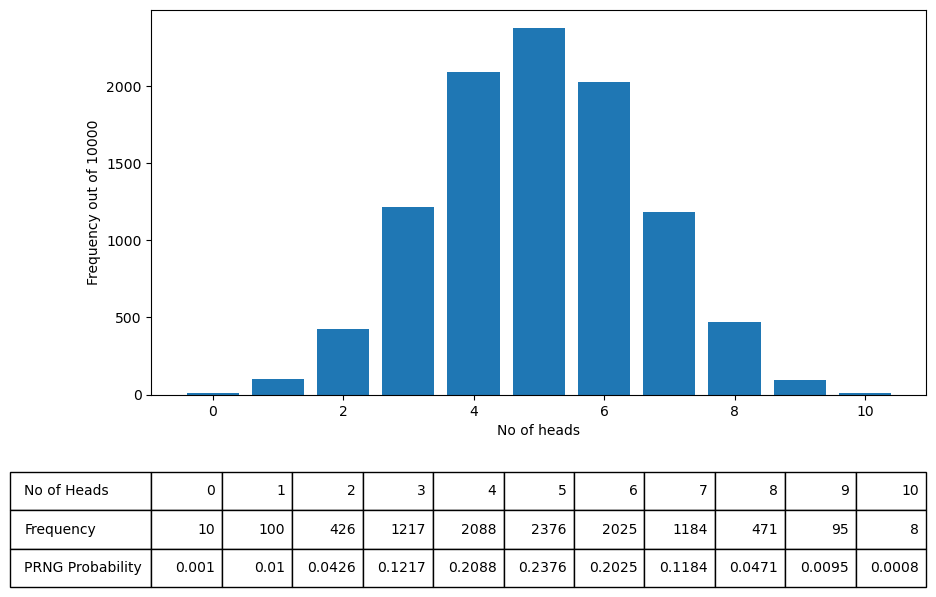

In [24]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)] # the _ used is just a placeholder variable and the 
# there are 10 coins and all 10 coins are flipped 10 000 times : for loop where range is no_of_repeats
no_of_heads, heads_counts = np.unique(result, return_counts=True) # action should be performed that many times
heads_probability = heads_counts/no_of_repeats
plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

In [25]:
from scipy.stats import binom

In [27]:
binom.pmf(k=7, n=10, p=.5) # probability of getting k successes in n trials given that the probabillity is p

0.11718749999999999

In [26]:
binomial_probabilities = binom.pmf(k=no_of_heads, n=10, p=.5)

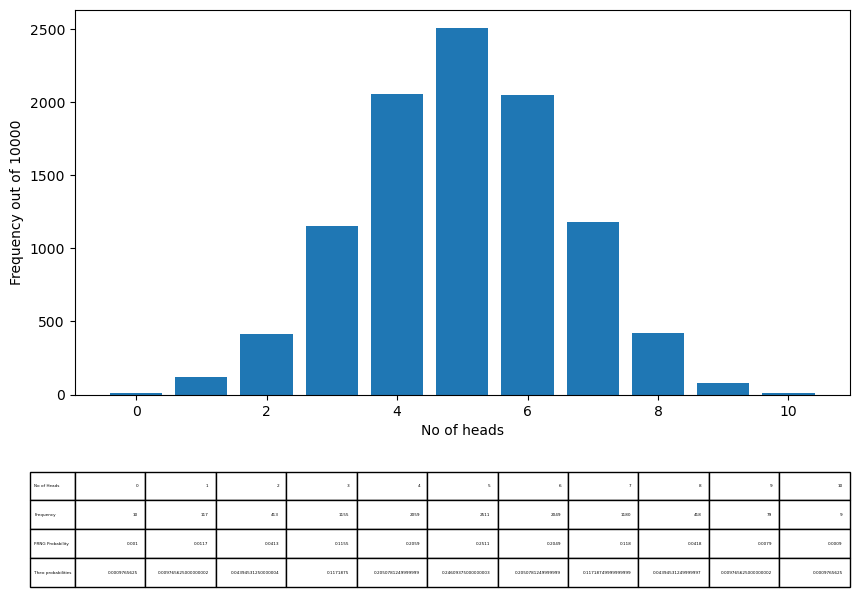

In [28]:
no_of_repeats = 10_000
result = [flip_coins(no_of_coins=10) for _ in range(no_of_repeats)] # the _ used is just a placeholder variable and the 
# there are 10 coins and all 10 coins are flipped 10 000 times : for loop where range is no_of_repeats
no_of_heads, heads_counts = np.unique(result, return_counts=True) # action should be performed that many times
heads_probability = heads_counts/no_of_repeats
plt.rcParams['figure.figsize'] = (10,5)
plt.bar(no_of_heads, heads_counts);
plt.xlabel('No of heads')
plt.ylabel(f'Frequency out of {no_of_repeats}')
plt.table([no_of_heads, heads_counts, heads_probability, binomial_probabilities],
          rowLabels=['No of Heads', 'Frequency', 'PRNG Probability','Theo probabilities'],
          loc='bottom',
          bbox=[0, -0.5, 1, 0.3])

## Exercise 1 :  12C, 13C

In [2]:
def isotope(abundance=100, probability=.5):
    '''
    Returns the number of values greater that 
    `probability` (considered as 'Heads').
    '''
    results = np.random.rand(no_of_coins)
    no_of_heads = np.sum(results > probability)
    return no_of_heads


